In [6]:
%%time
# El simbolo '!' sirve para correr comandos de bash en jupyter notebook.
!kaggle datasets download -d tawfikelmetwally/advertising-dataset -p /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/

Dataset URL: https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset
License(s): CC-BY-SA-4.0
advertising-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
CPU times: user 15.6 ms, sys: 12.1 ms, total: 27.7 ms
Wall time: 1.01 s


In [3]:
!pwd

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [4]:
#P.D.
t = %pwd
print(t)

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [5]:
%ls

data/          draft-2.ipynb  draft.ipynb


In [6]:
%ls data

Student_Performance.csv
df_clasificacion.csv
df_regresion.csv
df_regresion_students.csv
mobile_dataset.zip
student-performance-multiple-linear-regression.zip
user_behavior_dataset.csv


In [8]:
%%time
%cd /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/ 
# -> %cd {pwd}/data
!unzip -o advertising-dataset.zip
%cd ..

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data
Archive:  advertising-dataset.zip
  inflating: Advertising.csv         
/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos
CPU times: user 2.87 ms, sys: 6.86 ms, total: 9.74 ms
Wall time: 130 ms


In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('data/Advertising.csv')

In [14]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
# Revisamos que la metrica significa lo que siponemos
(df['Sales'].min(), df['Sales'].max())

(1.6, 27.0)

In [20]:
#Estado de los datos.
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


Comentario: no es necesario ninguna imputacion en los datos de origen pues no existen datos nulos en el conjunto de datos o información.

In [24]:
# AED - breve.
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

In [15]:
# Preparación(preprocesamiento) y observación de los datos.

In [28]:
df = df.drop('Unnamed: 0', axis=1)

In [30]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [64]:
df['total_spent'] = df[['TV', 'Radio', 'Newspaper']].sum(axis=1)

In [68]:
df.head()

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [66]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'total_spent'], dtype='object')

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
continuas = df.columns
print(continuas)

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'total_spent'], dtype='object')


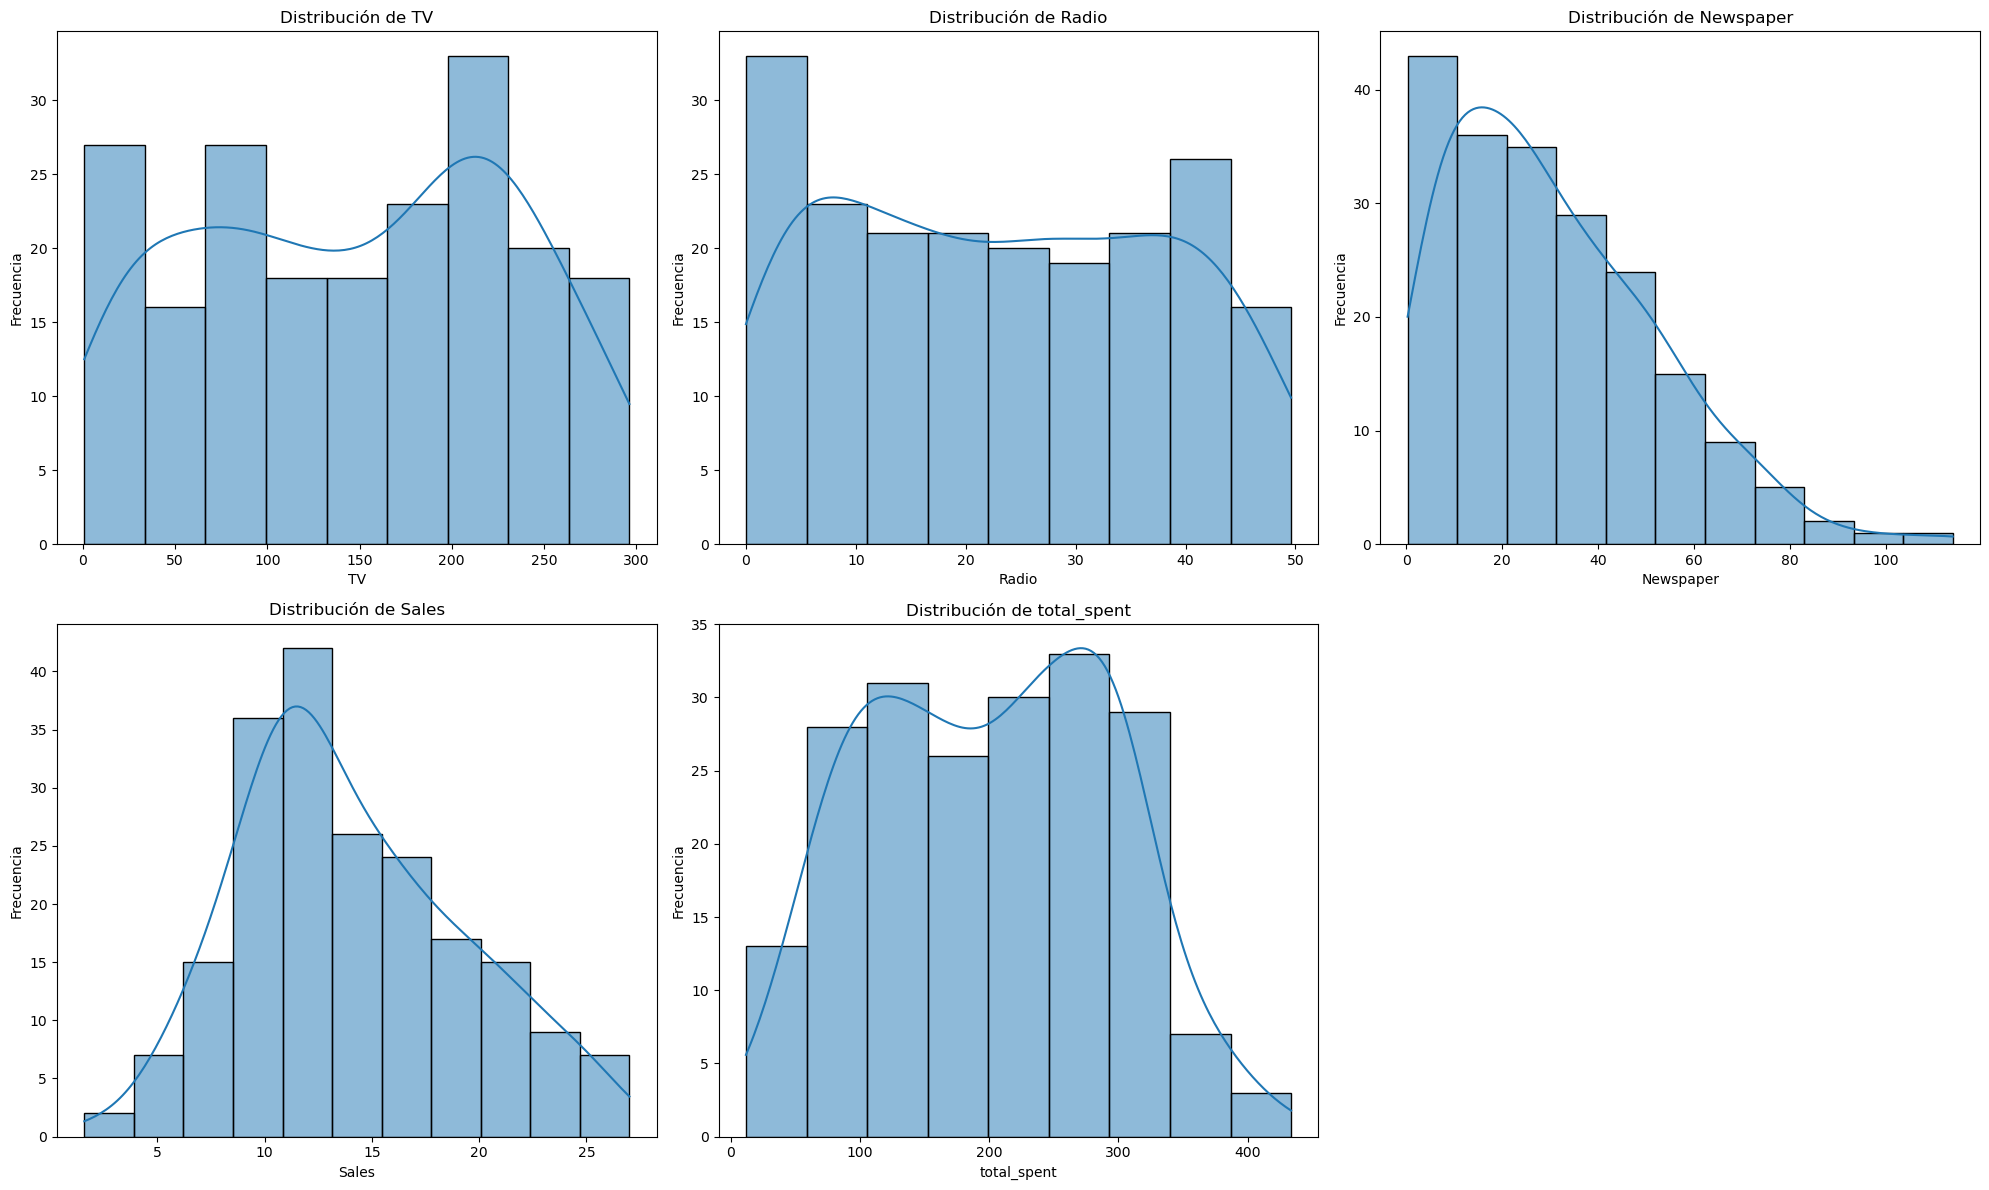

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, var in enumerate(df):
    sns.histplot(data=df, x=var, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_ylabel('Frecuencia')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [52]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [78]:
variables_predictoras = ['TV', 'Radio', 'Newspaper','total_spent']
variable_objetivo = 'Sales'

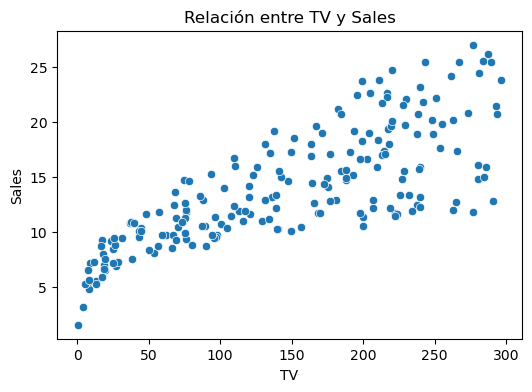

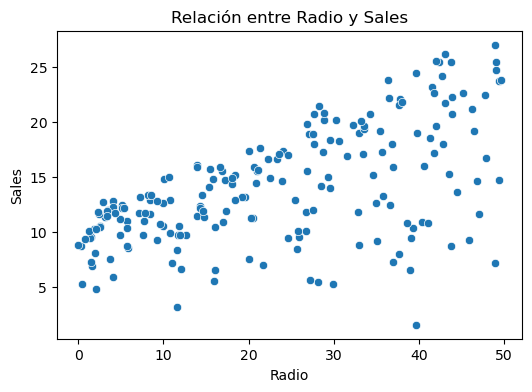

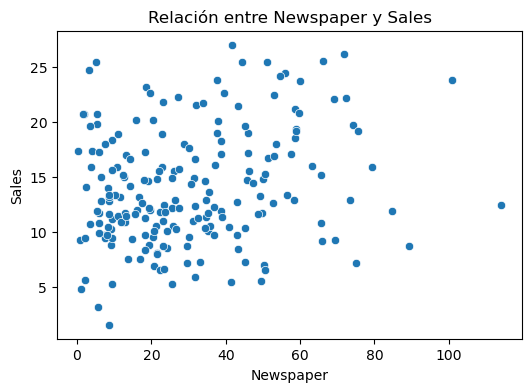

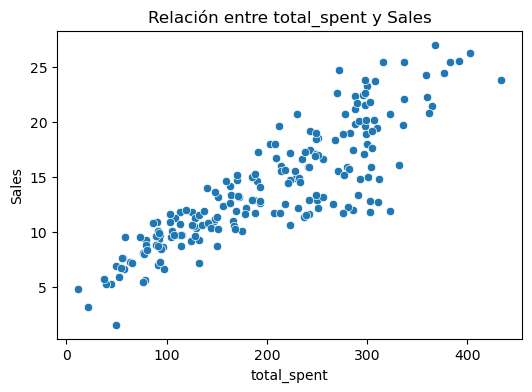

In [80]:
for predictor in variables_predictoras:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=predictor, y=variable_objetivo)
    plt.title(f'Relación entre {predictor} y {variable_objetivo}')
    plt.show()

In [82]:
correlation_matrix = df.corr()

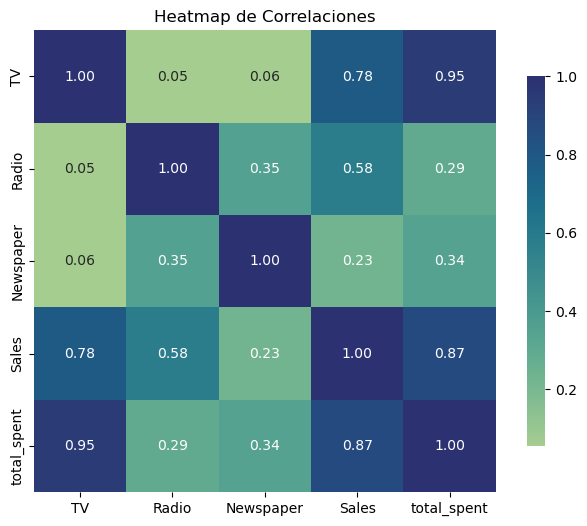

In [84]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='crest', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlaciones')
plt.show()

In [29]:
# Modelo de regresión

In [86]:
import pymc as pm
import arviz as az
import numpy as np

In [87]:
df_regresion = df.copy()

In [98]:
df_regresion.head()

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [92]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [96]:
X = df_regresion.drop('Sales', axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = df_regresion['Sales'].values

In [100]:
%%time
with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=50)
    alpha = pm.Normal('alpha', mu=np.mean(y), sigma=np.std(y))
    mu = alpha + pm.math.dot(X_scaled, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma, alpha]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 55 seconds.


CPU times: user 7.76 s, sys: 3.38 s, total: 11.1 s
Wall time: 1min 1s


In [102]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   2.270  6.843 -10.268   15.094      0.166    0.117    1698.0   
beta[1]   2.507  1.188   0.398    4.810      0.029    0.021    1691.0   
beta[2]  -0.441  1.741  -3.574    2.920      0.042    0.030    1673.0   
beta[3]   1.786  7.412 -12.033   15.426      0.179    0.127    1698.0   
alpha    14.022  0.118  13.803   14.251      0.002    0.001    3985.0   
sigma     1.695  0.086   1.546    1.870      0.001    0.001    3829.0   

         ess_tail  r_hat  
beta[0]    2300.0    1.0  
beta[1]    2396.0    1.0  
beta[2]    2343.0    1.0  
beta[3]    2293.0    1.0  
alpha      3302.0    1.0  
sigma      3696.0    1.0  


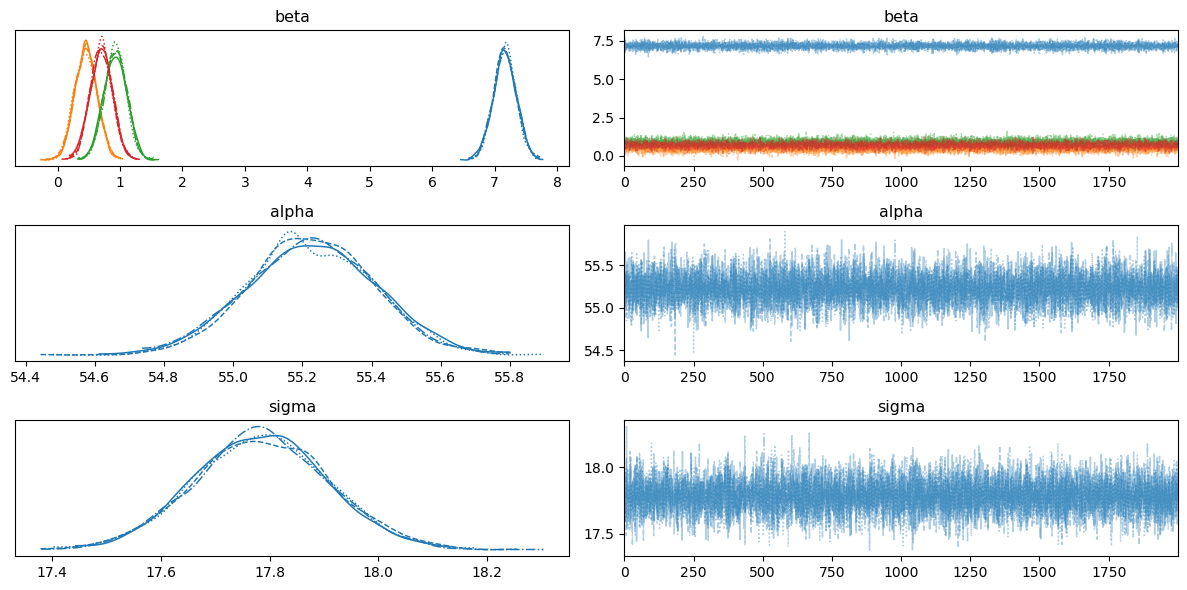

In [39]:
az.plot_trace(trace)
plt.tight_layout()

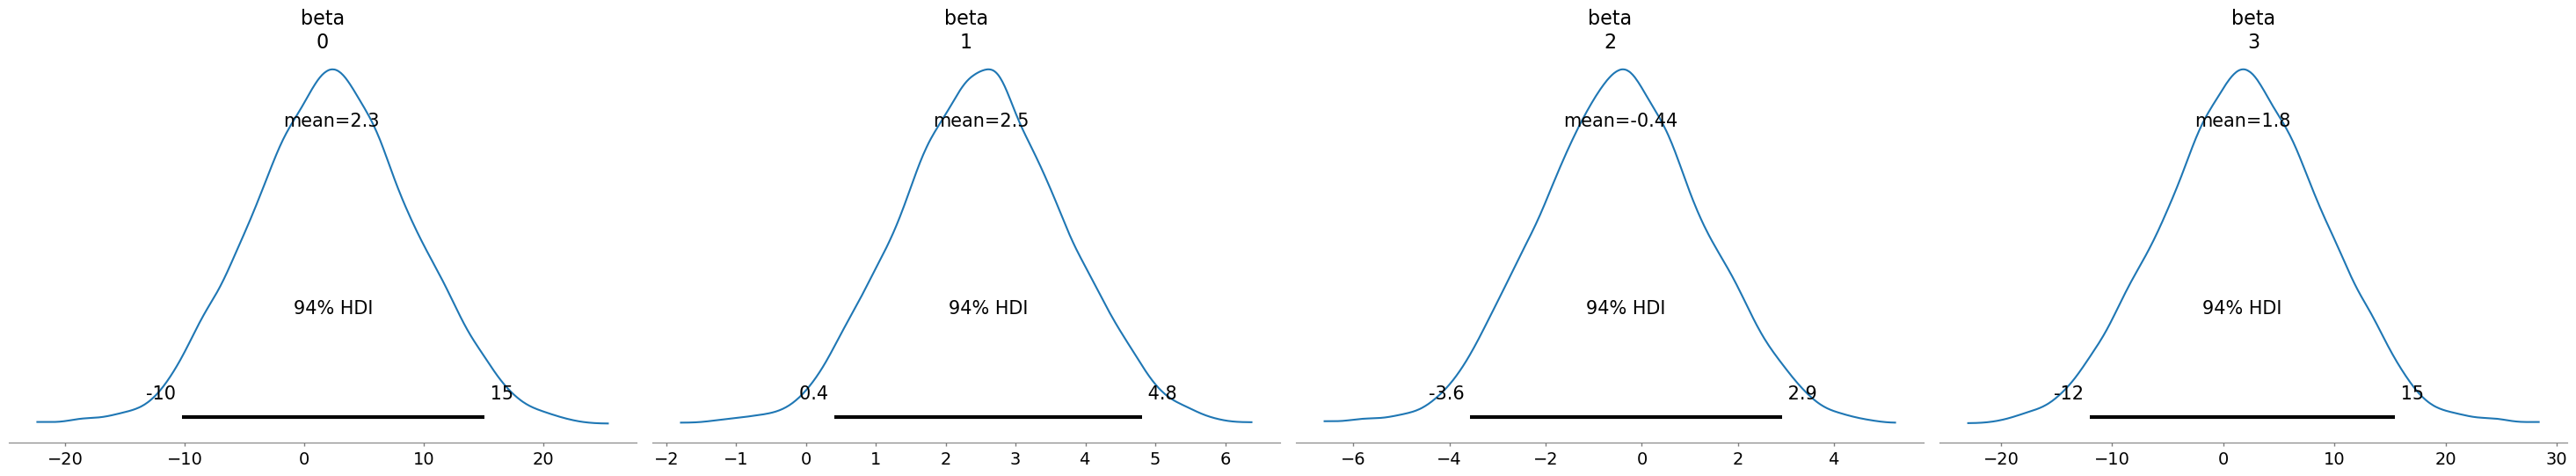

In [104]:
az.plot_posterior(trace, var_names=['beta'])
plt.tight_layout()

In [106]:
alpha_mean = float(trace.posterior['alpha'].mean())  # Convertir a escalar
beta_mean = trace.posterior['beta'].mean(dim=['chain', 'draw']).values  

In [108]:
y_pred = alpha_mean + np.dot(X_scaled, beta_mean)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

In [110]:
print("\nCoeficientes estandarizados (media posterior):")
for var, coef in zip(X.columns, trace.posterior['beta'].mean(axis=(0,1))):
    print(f"{var}: {coef:.3f}")


Coeficientes estandarizados (media posterior):
TV: 2.270
Radio: 2.507
Newspaper: -0.441
total_spent: 1.786


In [112]:
print(f"\nR² del modelo: {r2:.3f}")


R² del modelo: 0.897


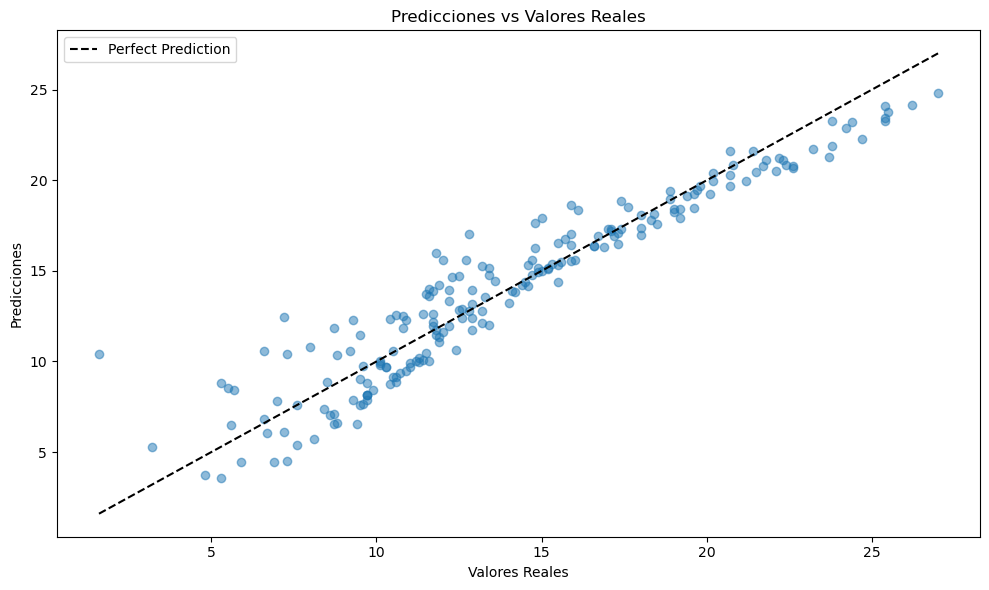

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.tight_layout()

In [116]:
y_pred_samples = np.zeros((len(trace.posterior.chain) * len(trace.posterior.draw), len(y)))

In [118]:
for i, chain in enumerate(trace.posterior.chain):
    for j, draw in enumerate(trace.posterior.draw):
        idx = i * len(trace.posterior.draw) + j
        alpha_sample = float(trace.posterior['alpha'].isel(chain=i, draw=j))
        beta_sample = trace.posterior['beta'].isel(chain=i, draw=j).values
        y_pred_samples[idx] = alpha_sample + np.dot(X_scaled, beta_sample)

In [120]:
pred_mean = y_pred_samples.mean(axis=0)
pred_hdi = az.hdi(y_pred_samples)

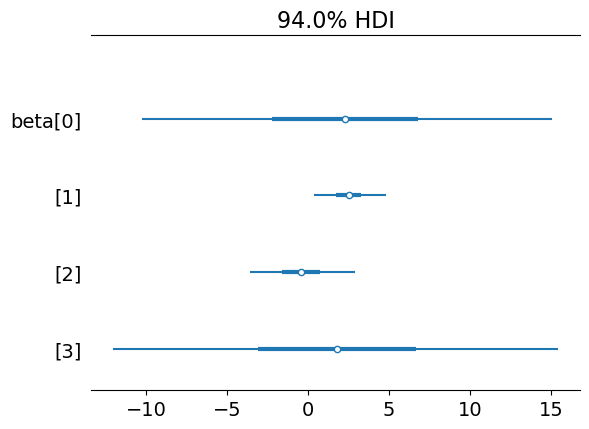

In [122]:
az.plot_forest(trace, var_names=['beta'], combined=True)
plt.tight_layout()

In [124]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   2.270  6.843 -10.268   15.094      0.166    0.117    1698.0   
beta[1]   2.507  1.188   0.398    4.810      0.029    0.021    1691.0   
beta[2]  -0.441  1.741  -3.574    2.920      0.042    0.030    1673.0   
beta[3]   1.786  7.412 -12.033   15.426      0.179    0.127    1698.0   
alpha    14.022  0.118  13.803   14.251      0.002    0.001    3985.0   
sigma     1.695  0.086   1.546    1.870      0.001    0.001    3829.0   

         ess_tail  r_hat  
beta[0]    2300.0    1.0  
beta[1]    2396.0    1.0  
beta[2]    2343.0    1.0  
beta[3]    2293.0    1.0  
alpha      3302.0    1.0  
sigma      3696.0    1.0  
